[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oscar-ramos/robotica-autonoma-python/blob/main/3-Intro-Vision/3-03-Filtros-Espaciales.ipynb)

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

Si se usa colab se puede utilizar las imágenes del repositorio, de lo contrario se pueden cargar manualmente.

In [ ]:
colab = False
if (colab):
    !wget -q https://github.com/oscar-ramos/robotica-autonoma-python/raw/main/3-Intro-Vision/imagenes/edificio.jpg
    !wget -q https://github.com/oscar-ramos/robotica-autonoma-python/raw/main/3-Intro-Vision/imagenes/edificio2.jpg
    !wget -q https://github.com/oscar-ramos/robotica-autonoma-python/raw/main/3-Intro-Vision/imagenes/monedas.jpg

# 1.&nbsp;Filtros espaciales

In [2]:
# Imagen inicial
I = cv2.imread('images/edificios.png')

## 1.1. Suavizado

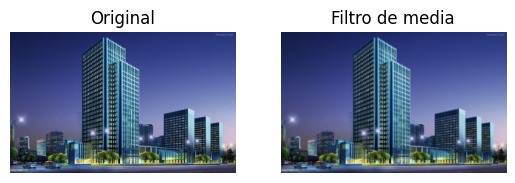

In [3]:
# Especificación manual de un filtro (kernel)
kernel = np.ones((5,5), np.float32)/25.0
Imedia = cv2.filter2D(I, -1, kernel)

# plt.figure(figsize=(12,12))
plt.subplot(121); plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.title('Original'); plt.axis('off')
plt.subplot(122); plt.imshow(cv2.cvtColor(Imedia, cv2.COLOR_BGR2RGB))
plt.title('Filtro de media'); plt.axis('off')
plt.show()

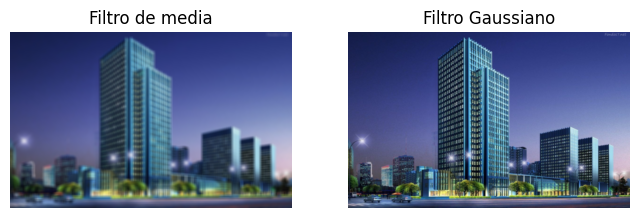

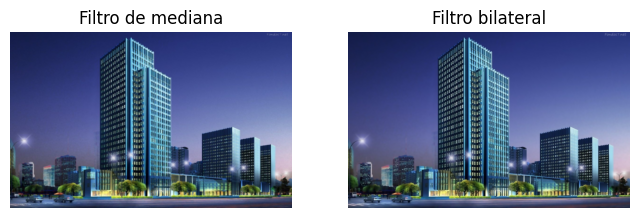

In [4]:
# Uso de funciones que implementan filtros
I_media = cv2.blur(I, (15,15))               # Filtro de media
I_gauss = cv2.GaussianBlur(I, (5,5), 0)      # Filtro Gaussiano
I_mediana = cv2.medianBlur(I, 5)             # Filtro de mediana
I_bilat = cv2.bilateralFilter(I, 9, 75, 75)  # Filtro bilateral

plt.figure(figsize=(8,4))
plt.subplot(121); plt.imshow(cv2.cvtColor(I_media, cv2.COLOR_BGR2RGB))
plt.title('Filtro de media'); plt.axis('off')
plt.subplot(122); plt.imshow(cv2.cvtColor(I_gauss, cv2.COLOR_BGR2RGB))
plt.title('Filtro Gaussiano'); plt.axis('off')

plt.figure(figsize=(8,4))
plt.subplot(121); plt.imshow(cv2.cvtColor(I_mediana, cv2.COLOR_BGR2RGB))
plt.title('Filtro de mediana'); plt.axis('off')
plt.subplot(122); plt.imshow(cv2.cvtColor(I_bilat, cv2.COLOR_BGR2RGB))
plt.title('Filtro bilateral'); plt.axis('off')
plt.show()

## 1.2. Gradientes

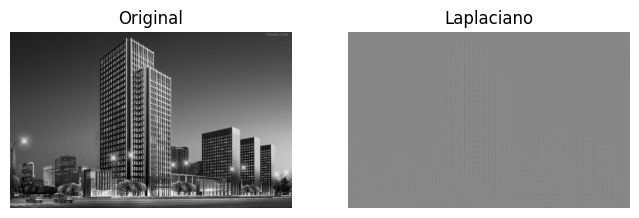

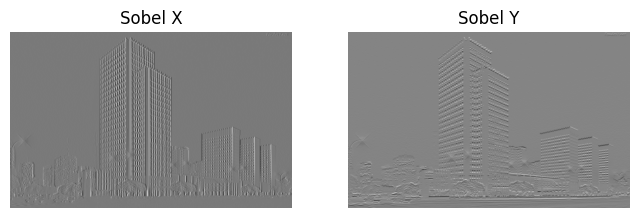

In [6]:
Igray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

I_laplacian = cv2.Laplacian(Igray, cv2.CV_64F)
I_sobelx = cv2.Sobel(Igray, cv2.CV_64F, 1, 0, ksize=5)
I_sobely = cv2.Sobel(Igray, cv2.CV_64F, 0, 1, ksize=5)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(Igray,cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(I_laplacian,cmap='gray'); plt.title('Laplaciano'); plt.axis('off')

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(I_sobelx,cmap='gray'); plt.title('Sobel X'); plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(I_sobely,cmap='gray'); plt.title('Sobel Y'); plt.axis('off')
plt.show()

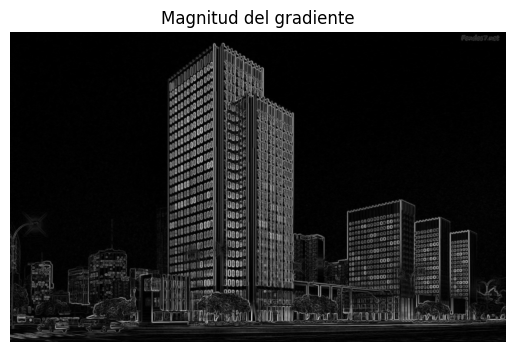

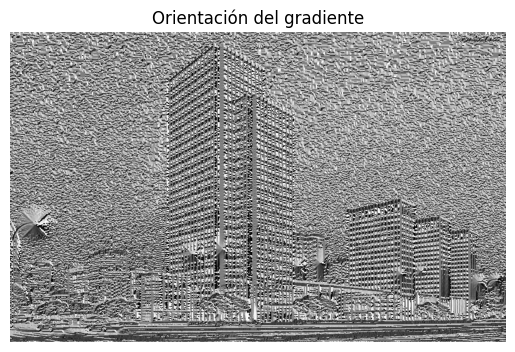

In [7]:
# Magnitud del gradiente
Igrad_mag = np.sqrt(I_sobelx**2+I_sobely**2)

# Orientación del gradiente
Igrad_or  = np.arctan2(I_sobely,I_sobelx)

# Mostrar
plt.imshow(Igrad_mag,cmap='gray'); plt.title('Magnitud del gradiente')
plt.axis('off'); plt.show()
plt.imshow(Igrad_or,cmap='gray'); plt.title('Orientación del gradiente')
plt.axis('off'); plt.show()

# 2.&nbsp;Detector de bordes de Canny

In [11]:
# Lectura de la imagen original
I = cv2.imread('images/edificios.png')

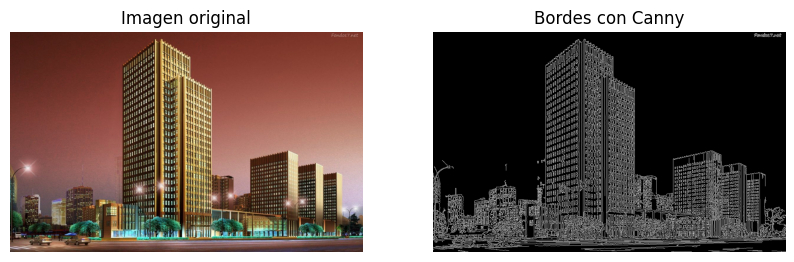

In [12]:
T_low = 50      
T_high = 150  
ksize = (5,5)
Icanny = cv2.Canny(I, T_low, T_high, ksize)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(I, cmap='gray'); plt.title('Imagen original'); plt.axis('off')
plt.subplot(122)
plt.imshow(Icanny, cmap='gray'); plt.title('Bordes con Canny'); plt.axis('off')
plt.show()

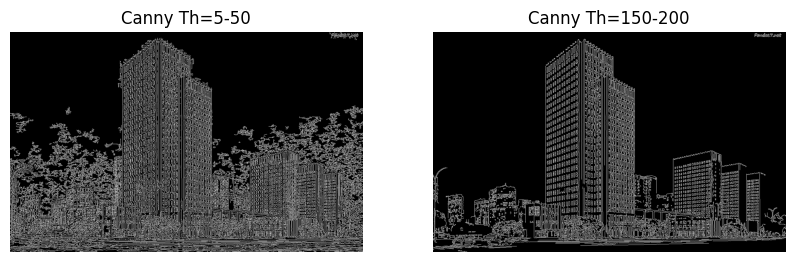

In [13]:
# Ejemplos con otros umbrales
Icanny2 = cv2.Canny(I, 5, 50)
Icanny3 = cv2.Canny(I, 150, 250)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(Icanny2,cmap='gray'); plt.title('Canny Th=5-50'); plt.axis('off')
plt.subplot(122)
plt.imshow(Icanny3,cmap='gray'); plt.title('Canny Th=150-200'); plt.axis('off')
plt.show()

# 3.&nbsp;Transformada de Hough

## 3.1. Hough para Líneas

In [11]:
# Lectura de la imagen original
I = cv2.imread('images/edificio_2.png')

# Bordes de la imagen en escala de grises
Igray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
Iedges = cv2.Canny(Igray, 50, 150, apertureSize=3)

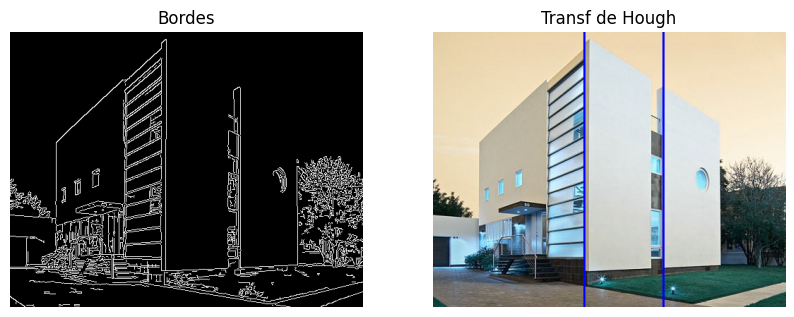

In [12]:
# Parámetros de Hough
votos = 210
lineas = cv2.HoughLines(Iedges, 1, 1*np.pi/180, votos)

# Imagen donde se dibujará las líneas
Ihough = I.copy()
for linea in lineas:
    for rho,theta in linea:
        a = np.cos(theta); b = np.sin(theta)
        x0 = a*rho; y0 = b*rho
        x1 = int(x0 + 1000*(-b)); y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b)); y2 = int(y0 - 1000*(a))
        cv2.line(Ihough, (x1,y1), (x2,y2), (0,0,255), 2)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(Iedges, cmap='gray'); plt.title('Bordes'); plt.axis('off')
plt.subplot(122)
plt.imshow(Ihough, cmap='gray'); plt.title('Transf de Hough'); plt.axis('off')
plt.show()

## 3.2. Hough probabilístico para líneas

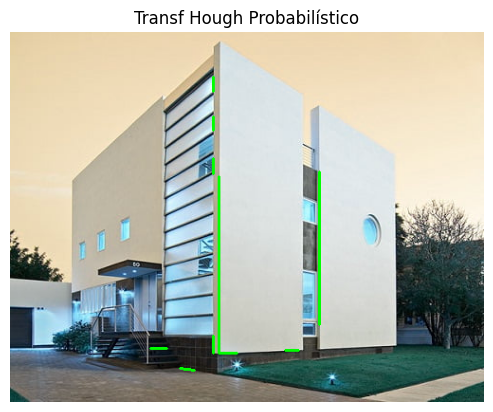

In [13]:
# Parámetros de hough probabilístico
minLineLength = 100
maxLineGap = 10
thvotes = 160
lines = cv2.HoughLinesP(Iedges, 1, np.pi/180, thvotes, minLineLength, maxLineGap)

# Imagen donde se dibujará las líneas
Ihoughp = I.copy()
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(Ihoughp, (x1,y1), (x2,y2), (0,255,0), 2)

plt.imshow(Ihoughp, cmap='gray')
plt.title('Transf Hough Probabilístico')
plt.axis('off'); plt.show()

## 3.3. Hough para cìrculos

In [15]:
I2 = cv2.imread('images/monedas_peru.png',0)
Imedian = cv2.medianBlur(I2, 5)

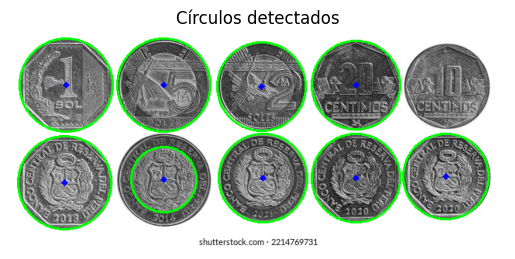

In [20]:
# Hough
circles = cv2.HoughCircles(Imedian, cv2.HOUGH_GRADIENT, 1, 40, param1=150,
                           param2=100, minRadius=10, maxRadius=200)
circles = np.uint16(np.around(circles))

# Imagen donde se dibujará los círculos
Ihough = cv2.cvtColor(I2, cv2.COLOR_GRAY2BGR)
for c in circles[0,:]:
    # Círculo externo
    cv2.circle(Ihough, (c[0],c[1]), c[2], (0,255,0), 2)
    # Centro del círculo
    cv2.circle(Ihough, (c[0], c[1]), 2, (0,0,255), 3)

plt.imshow(Ihough, cmap='gray')
plt.title('Círculos detectados')
plt.axis('off'); plt.show()

In [3]:
# Definición de filtros (idénticas a las del notebook)
def filter_original(frame, k, t): return frame
def filter_average(frame, k, t): return cv2.blur(frame, (k, k))
def filter_gaussian(frame, k, t): return cv2.GaussianBlur(frame, (k, k), 0)
def filter_median(frame, k, t): return cv2.medianBlur(frame, k)
def filter_bilateral(frame, k, t): return cv2.bilateralFilter(frame, k, 75, 75)
def filter_laplacian(frame, k, t):
    g = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    return cv2.convertScaleAbs(cv2.Laplacian(g, cv2.CV_64F))
def filter_sobel(frame, k, t):
    g = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    dx = cv2.Sobel(g, cv2.CV_64F, 1, 0, ksize=k)
    dy = cv2.Sobel(g, cv2.CV_64F, 0, 1, ksize=k)
    return cv2.convertScaleAbs(cv2.magnitude(dx, dy))
def filter_canny(frame, k, t):
    g = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(g, t, t*3, apertureSize=3)
    return cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
def filter_hough_lines(frame, k, t):
    g = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(g, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi/180, t)
    out = frame.copy()
    if lines is not None:
        for rho,theta in lines[:,0]:
            a, b = np.cos(theta), np.sin(theta)
            x0, y0 = a*rho, b*rho
            x1, y1 = int(x0-1000*b), int(y0+1000*a)
            x2, y2 = int(x0+1000*b), int(y0-1000*a)
            cv2.line(out, (x1,y1),(x2,y2),(0,0,255),2)
    return out
def filter_hough_linesp(frame, k, t):
    g = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(g, 50, 150, apertureSize=3)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, t, minLineLength=50, maxLineGap=5)
    out = frame.copy()
    if lines is not None:
        for x1,y1,x2,y2 in lines[:,0]:
            cv2.line(out,(x1,y1),(x2,y2),(0,255,0),2)
    return out
def filter_hough_circles(frame, k, t):
    g = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(g, k)
    circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1, g.shape[0]//8, param1=100, param2=t, minRadius=0, maxRadius=0)
    out = cv2.cvtColor(g, cv2.COLOR_GRAY2BGR)
    if circles is not None:
        for x,y,r in np.uint16(np.around(circles[0])):
            cv2.circle(out,(x,y),r,(0,255,0),2)
            cv2.circle(out,(x,y),2,(0,0,255),3)
    return out

# Mapeo de filtros a teclas
action_filters = {
    '0': filter_original, '1': filter_average,
    '2': filter_gaussian, '3': filter_median,
    '4': filter_bilateral, '5': filter_laplacian,
    '6': filter_sobel, '7': filter_canny,
    '8': filter_hough_lines, '9': filter_hough_linesp,
    'a': filter_hough_circles
}

# Inicializar cámara
cap = cv2.VideoCapture(0)
if not cap.isOpened(): raise RuntimeError("No se pudo abrir la cámara")

# Parámetros iniciales
active = '0'
k = 5    # tamaño de kernel (impar)
t = 100  # umbral inicial

print("Teclas: 0–4 suavizados,5=Lapl,6=Sobel,7=Canny,8=HoughL,9=HoughLP,a=HoughCirc, q=Salir")
print("←/→ ajustan kernel k, ↑/↓ ajustan umbral t")

while True:
    ret, frame = cap.read()
    if not ret: break

    # Aplicar filtro actual
    k_use = k if k % 2 == 1 else k+1
    out = action_filters[active](frame, k_use, t)
    cv2.putText(out, f"Filtro {active} | k={k_use} | t={t}", (10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)

    cv2.imshow("Processed", out)
    key = cv2.waitKeyEx(1)
    # Ajuste de kernel con flechas ←/→
    if key in (81, 2424832):  # izquierda
        k = max(1, k-2)
    elif key in (83, 2555904):  # derecha
        k += 2
    # Ajuste de umbral con flechas ↑/↓
    elif key in (82, 2490368):  # arriba
        t = min(t+5, 1000)
    elif key in (84, 2621440):  # abajo
        t = max(t-5, 0)
    elif key == ord('q'):
        break
    else:
        c = chr(key & 0xFF)
        if c in action_filters:
            active = c

cap.release()
cv2.destroyAllWindows()


Teclas: 0–4 suavizados,5=Lapl,6=Sobel,7=Canny,8=HoughL,9=HoughLP,a=HoughCirc, q=Salir
←/→ ajustan kernel k, ↑/↓ ajustan umbral t
